# EMAIL SPAM DETECTION
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [154]:
data = pd.read_excel("C:\\Users\\LENOVO\\Desktop\\spam.xlsx")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [155]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

So these Unnamed columns are almost full of nans so we can drop these columns

In [156]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


ham     4825
spam     747
Name: v1, dtype: int64

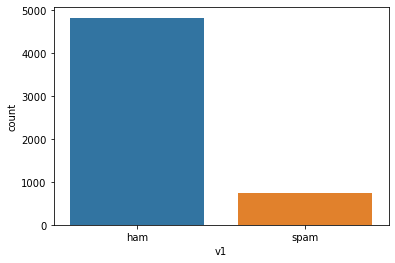

In [158]:
sns.countplot(x='v1', data= data)
data['v1'].value_counts()

The spam messages are very less in comparision to ham messages.


In [159]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [160]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [161]:
# Lets make the count of the length of the messages

data['length'] = data['v2'].str.len()
data.head(7)

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148.0
6,ham,Even my brother is not like to speak with me. ...,77.0


In [162]:
# Lets change the values of v1 so that we can assign ham to 0 and spam to 1

data.rename(columns={'v1':'label','v2':'message'},inplace = True)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


In [163]:
# label coding 0 And 1

data['label'].replace({'ham':0,'spam':1},inplace=True)

In [164]:
# Convert all messages to lower case

data['message'] = data['message'].str.lower()

In [165]:
data.head(5)

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111.0
1,0,ok lar... joking wif u oni...,29.0
2,1,free entry in 2 a wkly comp to win fa cup fina...,155.0
3,0,u dun say so early hor... u c already then say...,49.0
4,0,"nah i don't think he goes to usf, he lives aro...",61.0


# REMOVING REGULAR EXPRESSIONS

In [177]:
# Replace email addresses with 'email'

data['message'] = data['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [178]:
# Replace URLs with 'webaddress'

data['message'] = data['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [179]:
# Replace money symbols with 'moneysymb'

data['message'] = data['message'].str.replace(r'£|\$', 'dollers')

In [180]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'

data['message'] = data['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [181]:
# Replace numbers with 'numbr'
data['message'] = data['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctutaions

In [182]:
data['message'] = data['message'].str.replace(r'[^\w\d\s]', ' ')

In [183]:
# REPLACE WHITESPACES BETWEEN TERMS WITH A SINGLE SPACE

data['message'] = data['message'].str.replace(r'\s+', ' ')

In [184]:
# Remove leading and trailing whitespaces 

data['message'] = data['message'].str.replace(r'^\s+|\s+?$','')

In [185]:
data.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111.0
1,0,ok lar joking wif u oni,29.0
2,1,free entry in numbr a wkly comp to win fa cup ...,155.0
3,0,u dun say so early hor u c already then say,49.0
4,0,nah i don t think he goes to usf he lives arou...,61.0


In [176]:
data['message'] = data['message'].fillna('u r fine m all good')

In [187]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

In [189]:
# Remove Stopwords

data['message'] = data['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [199]:
lem=WordNetLemmatizer()

data['message'] = data['message'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [200]:
data['clean_length'] = data['message'].str.len()

data.head(5)

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111.0,82
1,0,ok lar joking wif oni,29.0,21
2,1,free entry numbr wkly comp win fa cup final tk...,155.0,139
3,0,dun say early hor c already say,49.0,31
4,0,nah think go usf life around though,61.0,35


In [201]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clear lenght', data.clean_length.sum())

Origian Length 446431.0
Clear lenght 297387


# Message distribution before cleaning

<function matplotlib.pyplot.show(close=None, block=None)>

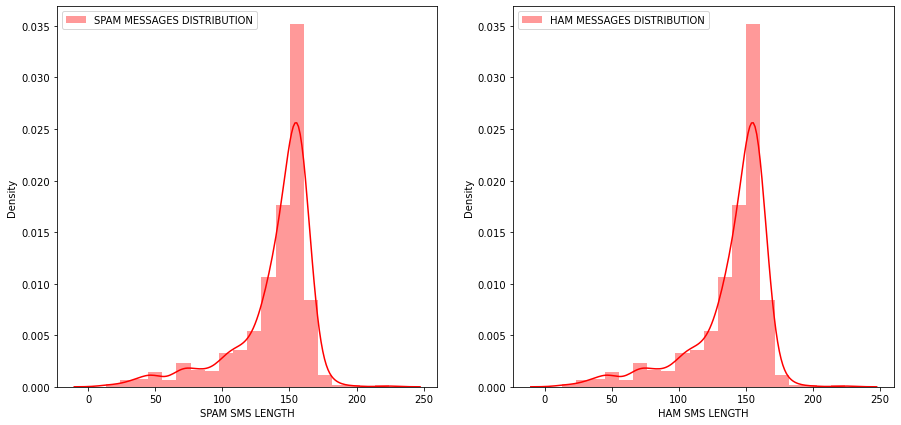

In [205]:

f,ax = plt.subplots(1,2,figsize= (15,7))
sns.distplot(data[data['label']==1]['length'],bins=20,ax=ax[0],
            label='SPAM MESSAGES DISTRIBUTION',color='r')
ax[0].set_xlabel('SPAM SMS LENGTH')
ax[0].legend()

sns.distplot(data[data['label']==1]['length'],bins=20,ax=ax[1],
            label='HAM MESSAGES DISTRIBUTION',color='r')
ax[1].set_xlabel('HAM SMS LENGTH')
ax[1].legend()
plt.show

# Message distribution after cleaning

<function matplotlib.pyplot.show(close=None, block=None)>

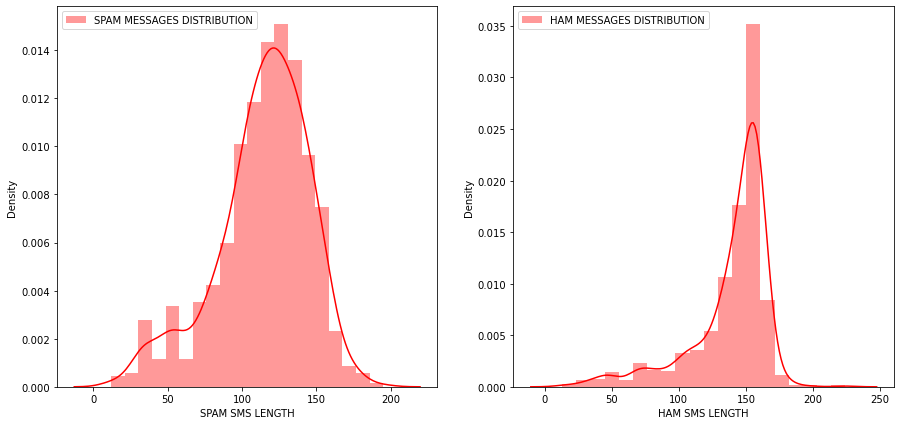

In [206]:

f,ax = plt.subplots(1,2,figsize= (15,7))
sns.distplot(data[data['label']==1]['clean_length'],bins=20,ax=ax[0],
            label='SPAM MESSAGES DISTRIBUTION',color='r')
ax[0].set_xlabel('SPAM SMS LENGTH')
ax[0].legend()

sns.distplot(data[data['label']==1]['length'],bins=20,ax=ax[1],
            label='HAM MESSAGES DISTRIBUTION',color='r')
ax[1].set_xlabel('HAM SMS LENGTH')
ax[1].legend()
plt.show

In [192]:
from wordcloud import WordCloud

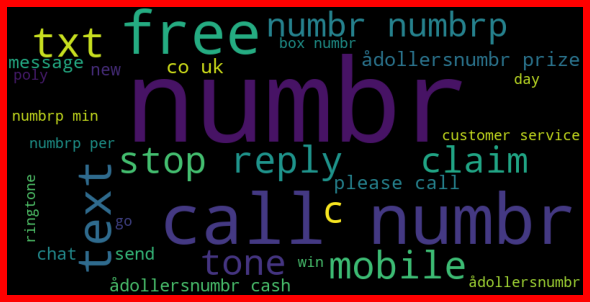

In [195]:
# GETTING SENSE OF LOUD WORDS IN SPAM
spams = data['message'][data['label']==1]
spam_cloud = WordCloud(width = 800, height = 400,
                          background_color ='black',
                          min_font_size = 10,
                          max_words = 30
                         ).generate(" ".join(spams))
plt.figure(figsize = (8, 8), facecolor = 'r') 
plt.imshow(spam_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

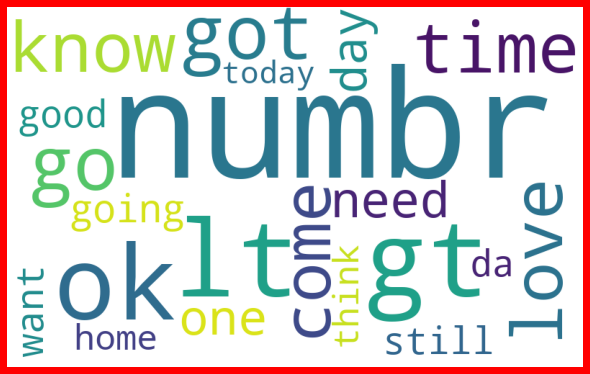

In [194]:
# GETTING SENSE OF LOUD WORDS IN HAM

Hams = data['message'][data['label']==0]
Ham_clouds = WordCloud(width = 800, height = 500,
                          background_color ='white',
                          max_words = 20
                         ).generate(" ".join(Hams))
plt.figure(figsize = (8, 8), facecolor = 'r') 
plt.imshow(Ham_clouds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [207]:
# convert text into vectors using TFIDF
# Instantiated MultinomialNB classifier
# SPlit features and labels




In [208]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.feature_extraction.text import TfidfVectorizer


In [211]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
naive = MultinomialNB()
features = tf_vec.fit_transform(data['message'])

X = features
y= data['label']

# MULTINOMIAL NB

In [212]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=56,test_size=.30)
naive.fit(X_train,Y_train)
y_pred = naive.predict(x_test)
print("final score => ",accuracy_score(y_test,y_pred))

final score =>  0.9712918660287081


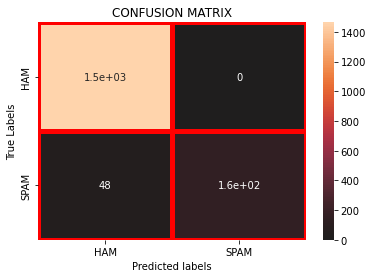

In [216]:
# Confusion matrix

confi_mat = confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(confi_mat,annot=True,ax=ax,linewidth=5,linecolor='r',center=0)
ax.set_xlabel('Predicted labels'); ax.set_ylabel("True Labels")
ax.set_title("CONFUSION MATRIX")
ax.xaxis.set_ticklabels(['HAM','SPAM'])
ax.yaxis.set_ticklabels(['HAM','SPAM'])
plt.show()

In [217]:
confi_mat

array([[1464,    0],
       [  48,  160]], dtype=int64)

In [219]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# LOGISTIC REGRESSION

In [220]:

LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(X_train, Y_train)

y_pred_train = LG.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(Y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9782051282051282
Test accuracy is 0.9688995215311005
[[1454   10]
 [  42  166]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1464
           1       0.94      0.80      0.86       208

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.92      1672
weighted avg       0.97      0.97      0.97      1672



# DECISION TREE CLASSIFIER

In [222]:
DT = DecisionTreeClassifier()

DT.fit(X_train, Y_train)
y_pred_train = DT.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(Y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9997435897435898
Test accuracy is 0.9802631578947368
[[1454   10]
 [  23  185]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1464
           1       0.95      0.89      0.92       208

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# RANDOM FOREST CLASSIFIER

In [223]:

RF = RandomForestClassifier()

RF.fit(X_train, Y_train)
y_pred_train = RF.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(Y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9997435897435898
Test accuracy is 0.9838516746411483
[[1464    0]
 [  27  181]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1464
           1       1.00      0.87      0.93       208

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# GRADIENT BOOSTING CLASSIFIER

In [224]:

grd=GradientBoostingClassifier(n_estimators=20)
grd.fit(X_train, Y_train)
y_pred_train = grd.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(Y_train, y_pred_train)))
y_pred_test = grd.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9576923076923077
Test accuracy is 0.9569377990430622
[[1463    1]
 [  71  137]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.99      0.66      0.79       208

    accuracy                           0.96      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.96      0.96      0.95      1672



In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
parameters = {'max_depth':range(2,4),'min_samples_leaf':range(2,4),'min_samples_split':range(2,4),'n_estimators':[20,30,60,80]}

clf = GridSearchCV(RF,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20}


In [227]:
rf = RandomForestClassifier(max_depth= 2, min_samples_leaf=2, min_samples_split= 3, n_estimators= 20)

In [228]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=20)

In [229]:
y_pred = rf.predict(x_test)

In [230]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1464,    0],
       [ 208,    0]], dtype=int64)

In [231]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1464
           1       0.00      0.00      0.00       208

    accuracy                           0.88      1672
   macro avg       0.44      0.50      0.47      1672
weighted avg       0.77      0.88      0.82      1672



In [232]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.8755980861244019


AFTER HYPERTUNING ACCURACY DECREASES

HENCE MY MODEL IS READY TO PREDICT WITH THE RANDOM FOREST CLASSIFIER MODEL AS IT GIVES BEST ACCUARCY (99.7%) AND HAVING
LESS DIFFERENCE BETWEEN ITS ACCURACY AND CROSS VAL SCORE

# HENCE MY MODEL IS COMPLETED